In [1]:
font = {'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)
%matplotlib inline

# Лекция 3: Распределения случайной величины

В прошлой лекции мы обсудили понятие генеральной совокупности и выборки. Мы определили генаральную совокупность как все множество объектов исследования, а выборку - как подмножество генеральной совокупности. Зачастую на практике (осбоенно в области машинного обучения)  предметом статистического исследования является случайная величина, и генеральной совокупностью является все множество ее значений. Строя модель цен на недвижимость мы анализируем выборку (данные об уже проданных) в надежде предсказать некоторую статистику генеральной совокупности (рыночную цену еще не проданного дома). 

Исторически генеральной совокупностью (популяцией) было именно конечное множество объектов исследования каждый из который мог оказаться в выборке с равной вероятностью. Ситуация меняется если мы переходим к описанию множества значений случайной величины. Сравним две выборки полученные броском монет:

- Выборка А: {1, 0, 0, 0, 1, 1, 0, 1}
- Выборка Б: {1, 1, 1, 1, 1, 1, 1, 0}

Выборка А получена из обычной монеты с равными шансами выпадания орла и решки. В принципе, генеральную совокупность значений для этой монеты можно было представить как {0, 1} а выборки - выборками с повторениями. В этом случае все статистики по выборкам вели бы себя так как было описано в предыдущей лекции.

Выборка Б получена из "фальшивой" монеты с бОльшей вероятностью выпадения одной из сторон. Множество значенией которые принмиает эта монета то же что и для монеты из выборки А: {0, 1}. Но ясно что это множество не подходит на роль генеральной совокупности - среднее по выборке не будет сходиться к среднему по популяции! Причина такого поведения понятна - __не все значения случайной величины равеновероятны__. 

Как же составить популяцию для значений случайной величины чтобы статистики по выборкам имели желаемые свойства? Можно сделать бесконечно много измерений случайной величины. Но этот подход не применим на практике. Кроме того, вся интересующая нас информация заключается не в бесконечных последовательностях измеренных значений, а в пределе частот с которыми выпадают значения. Получается, более экономным способом описания популяци занчений случайной величины является составление словаря, где каждому значению присвоена вероятность. Наприменр, для обычной монеты из примера выше, словарь будет иметь вид:

|Значение|Вероятность|
|------|----------|
| Орел (0)| 0.5|
|Решка (1)| 0.5|

Тогда как для "фальшивой" монеты он будет


|Значение|Вероятность|
|------|----------|
| Орел (0)| 0.1|
|Решка (1)| 0.9|

Функция ставящая в соответствие значению _дискретной_ случайной величины вероятность получения этого значения называется __функцией вероятности__ (Probability mass function, PMF).

Введение функции вероятности позволяет перейти от бесконечного набора чисел к компактной форме описания генеральной совокупности. Важно отметить, что такая "компактная" форма описания бесконечного множества чисел позволяет точно определять статистики для определенной функции вероятности.

Рассмотрим несколько часто встречающихся функций веорятности.

## Равномерое дискретное распределение

Если случайная величина принимает целые значения из определенного промежутка с равной вреоятностью, то она описываетс равномерным дисркетным расрпеделенем. Самый простой пример такой случайной величины - игральная кость принимающая значения от 1 до 6 с равной вероятностью.

Равномерное дискретное распределение определяется двумя целочисленными параметрами - минимальным и макисмальным значениями $a\leq b$. Рассмотрим как выглядит это распределение и выборки из него.

Text(0.5, 0, 'Значение величины')

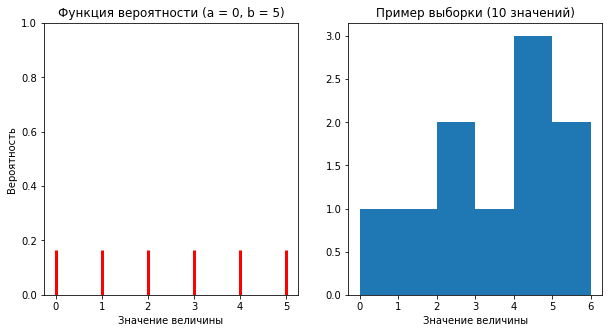

In [7]:
from scipy.stats import randint
import matplotlib.pyplot as plt
import numpy as np
a = 0
b = 5
size = 10
distr = randint(low = a, high = b+1)

sample = distr.rvs(size)
f, ax = plt.subplots(1, 2, figsize = (10, 5))
x = np.linspace(a, b, b-a+1)
ax[0].vlines(x, 0, distr.pmf(x), color='red', linestyles='-', lw=3)
ax[0].set_title(f"Функция вероятности (a = {a}, b = {b})")
ax[0].set_ylabel("Вероятность")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Значение величины")
ax[1].hist(sample, bins = np.linspace(a, b+1, b-a+2))
ax[1].set_title(f"Пример выборки ({size} значений)")
ax[1].set_xlabel("Значение величины")

Матожидание и дисперсю равномерного дискретного распределения можно выразить через его параметры:

$$\mu = \frac{b-a}{2}$$
$$\sigma^2 = \frac{n^2-1}{12}$$


## Распределение Бернулли (Bernoulli distribution)
Если случайная величина может принимать значения 0 или 1, то ее распрееделение является распределением Бернулли. 
Распределение имеет один параметр $p$ - вероятность принять значение 1.
$$ PMF(k) = p^k(1-p)^{(1-k)},\ k\in\{0,1\}$$

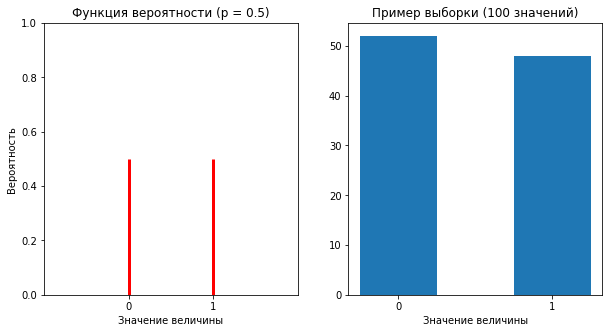

In [8]:
from scipy.stats import bernoulli 
import matplotlib.pyplot as plt
p = 0.5
size = 100
distr = bernoulli(p = p)

sample = distr.rvs(size)
f, ax = plt.subplots(1, 2, figsize = (10, 5))
x = [0, 1]
ax[0].vlines(x, 0, distr.pmf(x), color='red', linestyles='-', lw=3)
ax[0].set_title(f"Функция вероятности (p = {p})")
ax[0].set_ylabel("Вероятность")
ax[0].set_xlabel("Значение величины")
ax[0].set_xlim([-1, 2])
ax[0].set_ylim([0, 1])
ax[0].set_xticks([0,1])
ax[1].hist(sample, bins = 3, range = [-0.25, 1.25])
ax[1].set_title(f"Пример выборки ({size} значений)")
ax[1].set_xlabel("Значение величины")
ax[1].set_xticks([0,1])
# ax[1].legend()


Распределение Бернулли используется для моделирования событий котороые могут либо произойти либо нет - например, компонента системы который может выйти из строя или пользователя интернета прошедшего или нет по ссылке в реклманом баннере.

Зная параметр $p$ распределения Бернулли можно найти его матожидание и дисперисю. Несложно видеть, что выполняются следующие равенства:

$$\mu = p$$
$$\sigma^2 = p(1-p) $$

## Биномиальное распределение (Binomial distribution)

Если случайная величина представляет собой количество положительных исходов фиксированной серии эксприментов Бернулли (например людей больных ковидом в классе из 20 человек), ее распределение описывается биномиальным распределеним. Биномиальное распределение имеет два параметра - вероятонсть положительного исхода одного эксперимента $p$ и количестов экспериментов $n$:

$$ PMF(k) = \binom{n}{k} p^kq^{n-k} $$

Это распределение определено на множестве целых чисел от 0 до $n$. Рассмотрим распределение и случайную выборку из него

Text(0.5, 0, 'Значение величины')

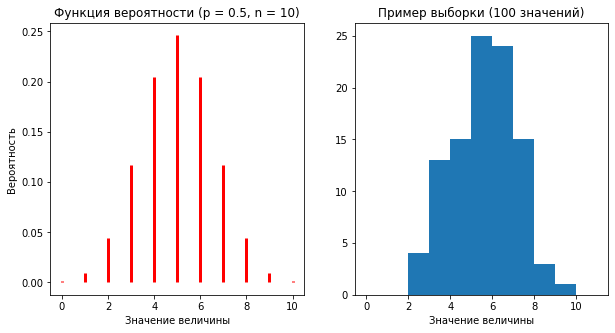

In [9]:
from scipy.stats import binom
p = 0.5
n = 10
size = 100
distr = binom(p = p, n = n)

sample = distr.rvs(size)
f, ax = plt.subplots(1, 2, figsize = (10, 5))
x = range(n+1)
ax[0].vlines(x, 0, distr.pmf(x), color='red', linestyles='-', lw=3)
ax[0].set_title(f"Функция вероятности (p = {p}, n = {n})")
ax[0].set_ylabel("Вероятность")
ax[0].set_xlabel("Значение величины")
ax[1].hist(sample, bins = np.linspace(0,n+1, n+2))
ax[1].set_title(f"Пример выборки ({size} значений)")
ax[1].set_xlabel("Значение величины")

Матожидение и дисперсия биномиельного распределения определены и их несложно получить из парметров распределения:

$$\mu = np$$
$$\sigma^2 = n p (1-p)$$

### Распределение Пуассона (Poisson distribution)

Распределене Пуассона описывает число независимых случайных событий произошедших за определенный интервал времени. Распределение Пуассона имеет один параметр - матожидание случайной величины $\mu$.

$$ PMF(k) = e^{-\mu}\frac{\mu^k}{k!}$$



Text(0.5, 0, 'Значение величины')

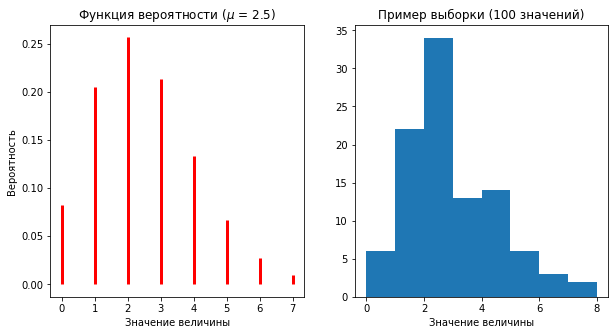

In [10]:
from scipy.stats import poisson
mu = 2.5
size = 100
distr = poisson(mu = mu)

sample = distr.rvs(size)
f, ax = plt.subplots(1, 2, figsize = (10, 5))
x = range(max(sample)+1)
ax[0].vlines(x, 0, distr.pmf(x), color='red', linestyles='-', lw=3)
ax[0].set_title(f"Функция вероятности ($\mu$ = {mu})")
ax[0].set_ylabel("Вероятность")
ax[0].set_xlabel("Значение величины")
ax[1].hist(sample, bins = range(max(sample)+2))
ax[1].set_title(f"Пример выборки ({size} значений)")
ax[1].set_xlabel("Значение величины")

Случайная величина распределенная по Пуассону принимает целочисленные значения от нуля до бесконечности, а среднее значение $\mu$ может быть нецелочисленным, но строго большим нуля.

Дисперсия распределения Пуасона равна среднему:

$$\sigma^2 = \mu$$

При больших значениях среднего (больше 50) гистограма случайных значений полученных из распрепделения Пуасона становится похожей на гистограмму значений полученных из нормального распределения с аналогичными средним и дисперсией.


## Непрерывные случайные величины

Пока мы говорили о популяциях составленных либо из конечного числа значений, либо описываемыми функциями распределения, где каждму возможному значению случайной величины соответствует вероятность реализации. Попробуем расширить круг возможных генеральных совокупностей включив в него случайные величины принимающие значения из непрерывного интервала. 

Например, время жизни свободного нейтрона описывается случайной величиной со средним значением около 880 секунд. Эта величина не дискретна и вероятность любого конкретного значения (ровно 160 секунд, ровно 87.5 секунд, и т.д.) будет стремиться нулю. С другой стороны, можно сказать что нейтрон распадется быстрее чем за 15 минут с вероятностью около 0.5. Аналогично, для каждого значения времени можно оценить вероятность того что нейтрон распадется _быстрее чем это время_.

Получается, что для случайных величин принимающих значения из непрерывного промежутка можно задать функцию на области значений которая будет описывать вероятность случайной величины $X$ принять значения меньше чем данное:

$$CDF(x) = P(X\leq x)$$

Эта функция называется __функцией распределения__ (Cumulative distribution function, CDF). Функция распределения определна на множестве значений случайной величины и монотонно возрастает от 0 до 1.

На практике для описания непрерывной случайной величины часто используется производная от функции распределения - __функция плотнсти вероятности__ (Probability density function, PDF). 

Функция плотности вероятности описывает вероятность принятия значений вблизи выбранной точки:

$$P(X\in[a, b]) = CDF(b)-CDF(a) \equiv \int_a^b PDF(x)dx$$

Рассмотрим ниже несколько наиболее часто встречающихся непрерывных распределений.

### Нормальное распределение и центральная пределеньная теорема

Рассмотрим выборку независимых идентично распределенных случайных величин $X_1...X_n$ и ее среднее

$$\bar{X} = \frac{\sum X_i}{n} $$

Будучи комбинацией случайных величин, среднее само по себе является случайной величиной. Каково его распределение? То есть, если мы будем случайным образом делать выборки одинакового размера и считать среднее, как оно будет распределено?

На примере ниже попытаемся смоделировать эту ситуацию для нескольих распределений. Воспользуемся следующим алгоритмом для построения рисунка ниже:

- Шаг 1: Выберем распределение (PDF) величины $X$ и изобразим его на левом рисунке
- Шаг 2: Сделаем выборки из 5 и 100 случайных значения из распредления полученного на предыдущем шаге и посчитатем среднее
- Шаг 3: Повторим Шаг 2 1000 раз и получим две выборки из 1000 средних
- Шаг 4: На среднем рисунку построим гистограмму средних из выборок размером 5, а на рисунке справа построим гистограму значений выборок размера 100
- Шаг 5: Повторим процедуру для нескольких распределений и изобразим полученные результаты.

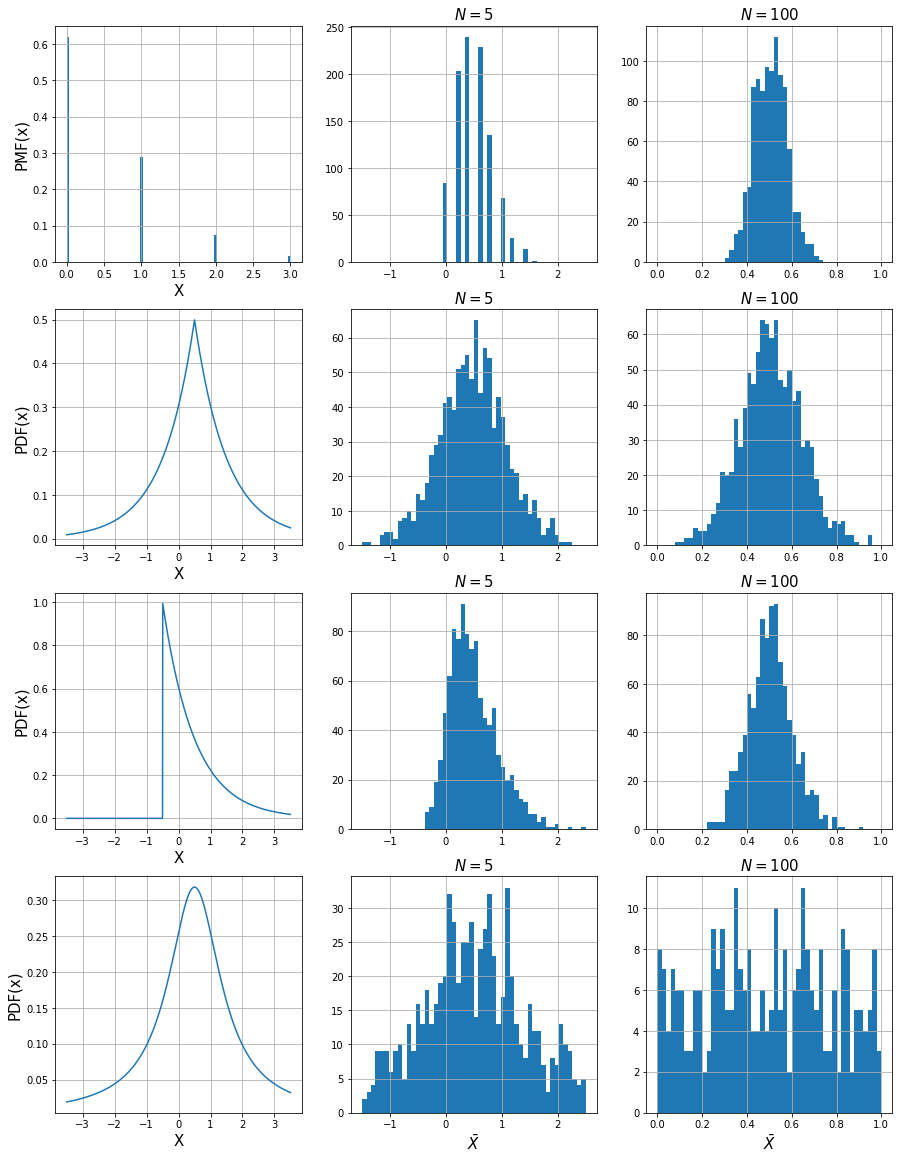

In [11]:
from scipy.stats import poisson, laplace, expon, cauchy


fig, ax = plt.subplots(4, 3, figsize = (15,20))
# for distribution curve
x= np.linspace(-3.5, 3.5, 1000)
ax[0, 0].hist(poisson(mu=0.5).rvs(size = 1000), bins = 100, range = [0, 3], weights = 1e-3*np.ones(1000))
ax[1, 0].plot(x, laplace(loc = 0.5).pdf(x))
ax[2, 0].plot(x, expon(loc = -0.5).pdf(x))
ax[3, 0].plot(x, cauchy(loc = 0.5).pdf(x))
ax[0,0].set_ylabel('PMF(x)', fontsize=15)
ax[1,0].set_ylabel('PDF(x)', fontsize=15)
ax[2,0].set_ylabel('PDF(x)', fontsize=15)
ax[3,0].set_ylabel('PDF(x)', fontsize=15)
ax[0,0].set_xlabel('X', fontsize=15)
ax[1,0].set_xlabel('X', fontsize=15)
ax[2,0].set_xlabel('X', fontsize=15)
ax[3,0].set_xlabel('X', fontsize=15)
ax[0,0].grid(True)
ax[1,0].grid(True)
ax[2,0].grid(True)
ax[3,0].grid(True)

n = 1000
size = 5
norm_mean = [poisson(mu = 0.5).rvs(size = size).mean() for i in range(n)]
laplace_mean = [laplace(loc = 0.5).rvs(size = size).mean() for i in range(n)]
expon_mean = [expon(loc = -0.5).rvs(size = size).mean() for i in range(n)]
cauchy_mean = [cauchy(loc = 0.5).rvs(size = size).mean() for i in range(n)]
ax[0, 1].hist(norm_mean, range = [-1.5, 2.5], bins = 50)
ax[1, 1].hist(laplace_mean, range = [-1.5, 2.5], bins = 50)
ax[2, 1].hist(expon_mean, range = [-1.5, 2.5], bins = 50)
ax[3, 1].hist(cauchy_mean, range = [-1.5, 2.5], bins = 50)
# ax[0,1].set_xlabel('$\\bar{X}$')
# ax[1,1].set_xlabel('$\\bar{X}$')
# ax[2,1].set_xlabel('$\\bar{X}$')
ax[3,1].set_xlabel('$\\bar{X}$', fontsize=15)
ax[0,1].set_title("$N = 5$", fontsize=15)
ax[1,1].set_title("$N = 5$", fontsize=15)
ax[2,1].set_title("$N = 5$", fontsize=15)
ax[3,1].set_title("$N = 5$", fontsize=15)
ax[0,1].grid(True)
ax[1,1].grid(True)
ax[2,1].grid(True)
ax[3,1].grid(True)

n = 1000
size = 100
norm_mean = [poisson(mu = 0.5).rvs(size = size).mean() for i in range(n)]
laplace_mean = [laplace(loc = 0.5).rvs(size = size).mean() for i in range(n)]
expon_mean = [expon(loc = -0.5).rvs(size = size).mean() for i in range(n)]
cauchy_mean = [cauchy(loc = 0.5).rvs(size = size).mean() for i in range(n)]
ax[0, 2].hist(norm_mean, range = [0, 1], bins = 50)
ax[1, 2].hist(laplace_mean, range = [0, 1], bins = 50)
ax[2, 2].hist(expon_mean, range = [0, 1], bins = 50)
ax[3, 2].hist(cauchy_mean, range = [0, 1], bins = 50)
# ax[0,2].set_xlabel('$\\bar{X}$')
# ax[1,2].set_xlabel('$\\bar{X}$')
# ax[2,2].set_xlabel('$\\bar{X}$')
ax[3,2].set_xlabel('$\\bar{X}$', fontsize=15)
ax[0,2].set_title("$N = 100$", fontsize=15)
ax[1,2].set_title("$N = 100$", fontsize=15)
ax[2,2].set_title("$N = 100$", fontsize=15)
ax[3,2].set_title("$N = 100$", fontsize=15)
ax[0,2].grid(True)
ax[1,2].grid(True)
ax[2,2].grid(True)
ax[3,2].grid(True)

Видно, что с ростом размера выборки средние значеня полученные из выборок первых трех распределений становятся распределены схожей колоколообразной формой. Эта закономерность называется __центральной предельной теоремой__  (Central Limit Theorem):   сумма независимых одинаково распределённых случайных величин имеет распределение близкое к _нормальному_. 

    Видно что центральная предельная теорема не работает для последнего слуачая - дело в том, что у последлнего распределения матожидание не определено.
    
Нормальное распределение (Гауссовское распределение, Normal distribution, Gaussian distribution) явлется самым частым выбором описания случайной величины для которой известно только приблизительное значение. Нормальное распределение задается двумя параметрами - средним $\mu$ и дисперисией $\sigma^2$:

$$ PDF(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Нормальное распределение со средним $\mu$ b и дисперсией $\sigma^2$ обозначается  $\mathcal{N}(\mu, \sigma)$.

На изображении ниже находятся несколько нормальных распределений с разными параметрами.

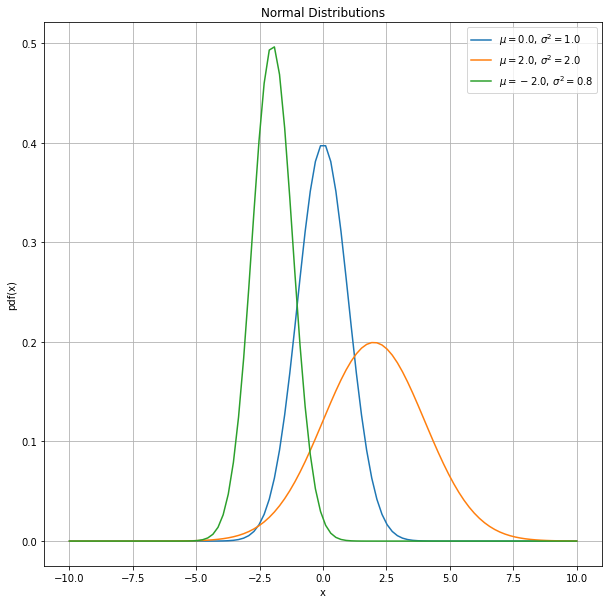

In [12]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,100)
pars = [[0.0, 1.0],
#         [1.0, 1.0],
        [2.0, 2.0],
        [-2.0, 0.8]]
for p in pars:
    ax.plot(x, norm.pdf(x,loc = p[0], scale=p[1]), label=f"$\mu={p[0]}$, $\sigma^2={p[1]}$")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distributions')
ax.legend(loc='best', frameon=True)
# ax.set_ylim(0,0.45)
ax.grid(True)


Своим широким применением нормальное распределение обязано центральной предельной теореме. При выполнениии некоторых условий, значение суммы случайных величин распределено нормально вне зависимости от изначального распределения этих величин. Вследствие этого, нормальное распределение является естественным выбором при описании многих экспериментальных значений (полученных как результат усреденения нескольких измерений). 

Фактически, любая случайная величина подразумевается распределенной нормально если ее распределенеие отдельно не оговорено. Если значение какой-либо величины сообщается с ошибкой ($a\pm b$), это можно понимать как "истиное значение этой случайной величины неизвестно, но оно распределено нормально с центром в $a$ и среднеквадратичным отклонением $b$" (в Байесовской парадигме).

Из-за распространения нормального распределения, полезно квантили распределения - какая часть плотности вероятности содержится в разных диапазонах:

- В интервале $[\mu-\sigma,\mu+\sigma]$ содержится $\sim68.2\%$             плотности вероятности

- В интервале $[\mu-1.28\sigma,\mu+1.28\sigma]$ содержится $\sim90\%$ плотности вероятности

- В интервале $[\mu-2\sigma,\mu+2\sigma]$   содержится $\sim95.4\%$ плотности вероятности

- В интервале $[\mu-3\sigma,\mu+3\sigma]$   содержится $\sim99.7\%$ плотности вероятности

Интервалы в 1, 2, и 3 среднеквадратичных отклонения изображены ниже

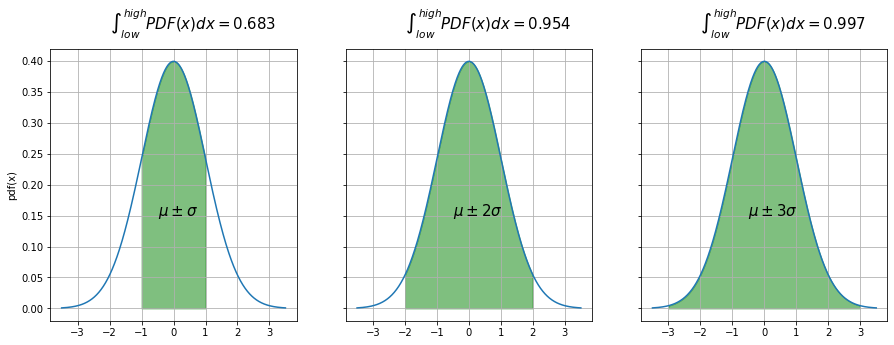

In [13]:
from scipy.stats import norm
mu=0 
sigma=1
norm_rv = norm(loc = mu,scale = sigma)



fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True)
# for distribution curve
x= np.linspace(-3.5, 3.5, 1000)
ax[0].plot(x, norm_rv.pdf(x))
ax[1].plot(x, norm_rv.pdf(x))
ax[2].plot(x, norm_rv.pdf(x))
ax[0].set_ylabel('pdf(x)')
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

n = 1
x_min = mu-n*sigma
x_max = mu+n*sigma
px=np.arange(x_min,x_max,0.01)
ax[0].fill_between(px,norm_rv.pdf(px),alpha=0.5, color='g')
pro=norm_rv.cdf(x_max) - norm_rv.cdf(x_min)
ax[0].text(-2,0.45,"$\int_{low}^{high}{PDF(x)dx} = $"+str(round(pro,3)), fontsize=15)
ax[0].text(-0.5,0.15,"$\mu\pm\sigma$", fontsize=15)

n = 2
x_min = mu-n*sigma
x_max = mu+n*sigma
px=np.arange(x_min,x_max,0.01)
ax[1].fill_between(px,norm_rv.pdf(px),alpha=0.5, color='g')
pro=norm_rv.cdf(x_max) - norm_rv.cdf(x_min)
ax[1].text(-2,0.45,"$\int_{low}^{high}{PDF(x)dx} = $"+str(round(pro,3)), fontsize=15)
ax[1].text(-0.5,0.15,"$\mu\pm2\sigma$", fontsize=15)

n = 3
x_min = mu-n*sigma
x_max = mu+n*sigma
px=np.arange(x_min,x_max,0.01)
ax[2].fill_between(px,norm_rv.pdf(px),alpha=0.5, color='g')
pro=norm_rv.cdf(x_max) - norm_rv.cdf(x_min)
ax[2].text(-2,0.45,"$\int_{low}^{high}{PDF(x)dx} = $"+str(round(pro,3)), fontsize=15)
ax[2].text(-0.5,0.15,"$\mu\pm3\sigma$", fontsize=15)
plt.show()

### Распределение Стьюдента (Student t-distribution)

Представим что у нас есть небольшая выборка $X_1...X_n$ нормально распределенных величин с распределением $\mathcal{N}(\mu,\sigma)$. 
Выпишем среднее этой выборки:

$$\bar{X} = \frac{1}{n} \sum_i X_i$$

И несмещеную дисперсию:

$$S^2 = \frac{1}{n-1}\sum(\bar{X}-X_i)^2$$

Из секции выше мы уже знаем, что среднее $\bar{X}$ такой выборки так же является случайной величиной и оно распределено нормально. Из предыдущей лекции мы знаем что среднее выборки будет сходиться к среднему по популяции, а дисперсия оценки среднего связана с дисперсией популяции и размером выборки как $\sigma/\sqrt{n}$. Таким образом, среднее значение выборки - случайная величина распределенная по закону $\mathcal{N}(\mu,\sigma/\sqrt{n}$). Соответственно, величниа 
$$\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$$
распределена по закону $\mathcal{N}(0, 1)$.


Знание распределения среднего выборки случайных величин можно использовать, например, для поиска отклонений. Например, вы управлете компанией по производству тяжелой техники и вы анализируете результаты вашего отдела продаж. Выручка от каждого вашего станка примерно известна, но может немного меняться в зависимости от удачи и опыта менеджера по продажам - то есть это случайная величина расрпеделенная нормально. Сравнивая средние выручки каждого из ваших менеджеров с ожидаемым распределением, можно выделить как самых аномально успешных (для них величина выше будет, например, больше 2 - возможно их стоит повысить) так и не слишком удачливых (для них эта величина будет соответственно, меньше -2 - возможно стоит подробнее рассмотреть их производительность).

Несложно заметить, что формула выше требует знания дисперсии $\sigma^2$ исходного распределения. Зачастую эта дисперсия неизвестна - в примере с менеджерами по продажам выше несложно представить что средняя выручка задается руководством, а менеджеры самостоятельно решают какие скидки и накрутки они будут делать от сделки к сделке. В таком случае, дисперсию по популяции $\sigma^2$ можно заменить дисперисией по выборке $S^2$, вводя новую величну:

$$t = \frac{\bar{X}-\mu}{S/\sqrt{n}}$$

Эта величина называется t-статистикой. С ростом выборки несмещеная оценка дисперсии $S^2$ будет стремиться к дисперсии $\sigma^2$ и распределеление t-статистики будет стремиться к нормальному. При малых же размерах выборки (как мы демонстрировали в прошлой лекции), $S$ будет немного меньше $\sigma$, поэтому можно ожидать бОльшего разброса значений $t$ - а значит и более "тяжелых" хвостов распределения.

Распределение t-статистики называется распределением Стьюдента и имеет один параметр - число степеней свободы (размер выборки):

$$ PDF(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})} (1+\frac{x^2}{\nu})^{-(\nu+1)/2} $$

Рассмотрим распределение стьюдента для нескольких степеней свободы:


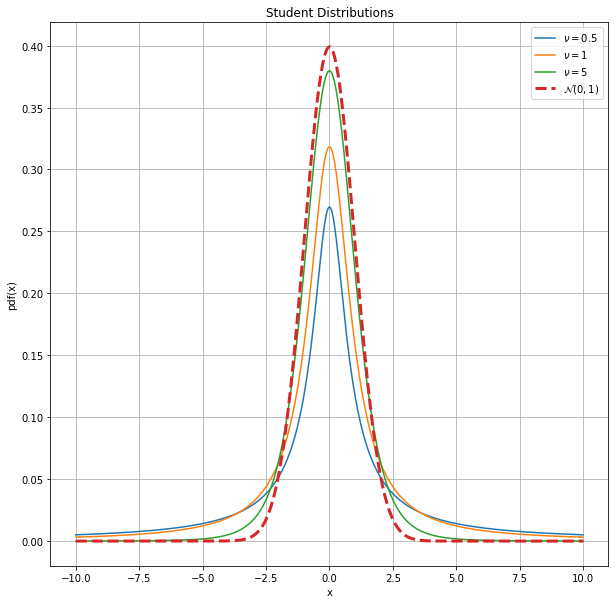

In [14]:
from scipy.stats import t, norm
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,1000)
pars = [0.5, 1, 5]
for p in pars:
    ax.plot(x, t.pdf(x,df = p), label=f"$\\nu={p}$")
ax.plot(x, norm.pdf(x), label="$\\mathcal{N}(0, 1)$", ls = '--', linewidth = 3)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Student Distributions')
ax.legend(loc='best', frameon=True)
ax.grid(True)

Среднее значение распределения Стьюдента равно нулю если $\nu>1$ и не определено в остальных случаях. Дисперсия равна $\frac{\nu}{\nu-2}$ если $\nu>2$, дисперсия бесконечна если $\nu\in(1, 2]$, и не определена в остальнх случаях.

### Распределение Коши (Cauchy distribution)

Частный случай распределения Стьюдента с одной степенью свободны наззывается распределением Коши:

$$PDF(x) = \frac{1}{\pi\gamma\,\left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}\!$$

Параметры распредлеения Коши - смещение $x_0$ и масштаб $\gamma$. Рассмотрим как выглядит распределение Коши для разных наборов параметров:

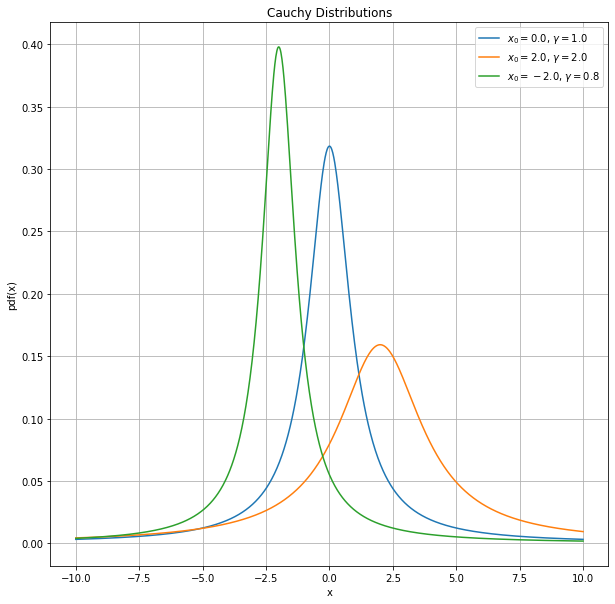

In [15]:
from scipy.stats import t
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,1000)
pars = [[0.0, 1.0],
#         [1.0, 1.0],
        [2.0, 2.0],
        [-2.0, 0.8]]
for p in pars:
    ax.plot(x, t.pdf(x,df = 1, loc = p[0], scale=p[1]), label=f"$x_0={p[0]}$, $\gamma={p[1]}$")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Cauchy Distributions')
ax.legend(loc='best', frameon=True)
# ax.set_ylim(0,0.45)
ax.grid(True)

Распределние Коши описывает распределение случайной величины полученой как отношение двух независимых нормально распределенных случайных величин: если $X\sim\mathcal{N}(0, 1)$, $Y\sim\mathcal{N}(0,1)$ и X и Y независимы, то $X/Y\sim\text{Cauchy}(0,1)$

    Распределние Коши часто используется в физике высоких для описания распределения некоторых резонансов. В этой области науки распределение Коши более известно как распределение Брейта-Вигнера.


### Распределение Лапласа (Laplace distribution / double-sided exponential)

Распределение Стьюдента характеризуется более тяжелыми хвостами чем нормальное распределение. Для моделирования случайных величн с более легкими хвостами может использоваться распределение распределение Лапласа:

$$PDF(x) = {\displaystyle {\frac {1}{2b}}\exp \left(-{\frac {|x-\mu |}{b}}\right)}$$

Распределение задается двумя параметрами - средним $\mu$ и масштабом $b$. Именно масштаб описывает дисперсию:

$$\sigma = \sqrt{2}b$$.


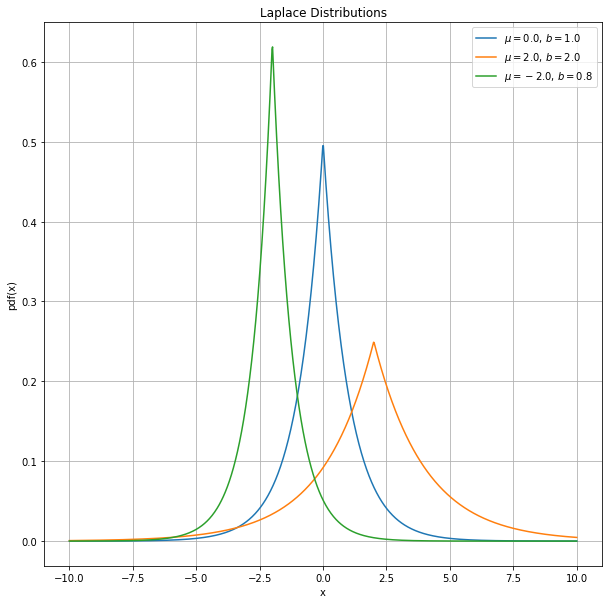

In [16]:
from scipy.stats import laplace
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,1000)
pars = [[0.0, 1.0],
#         [1.0, 1.0],
        [2.0, 2.0],
        [-2.0, 0.8]]
for p in pars:
    ax.plot(x, laplace.pdf(x,loc = p[0], scale=p[1]), label=f"$\mu={p[0]}$, $b={p[1]}$")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Laplace Distributions')
ax.legend(loc='best', frameon=True)
# ax.set_ylim(0,0.45)
ax.grid(True)

В следующих лекциях мы будем использовать распределение Лапласа для описания наших априорных знаний о парамтерах моделей машинного обучения (регулряизация лассо). 

В секциях выше мы рассмотрели несколько центральных распределений. В некоторых случаях выбор распределения для использования в модели продиктован самой моделью (мы обсуждали это в разговоре о распределении Стюдента, например). Но зачастую процессы в данных не до конца понятны, и выбор распределения осуществляется "на глаз" - симметричное распределение или нет, тяжелые или легкие хвосты и т.д.. Сравним три рассмотренных выше распределения -  Лапласа, Коши, и нормальное на одном графике.

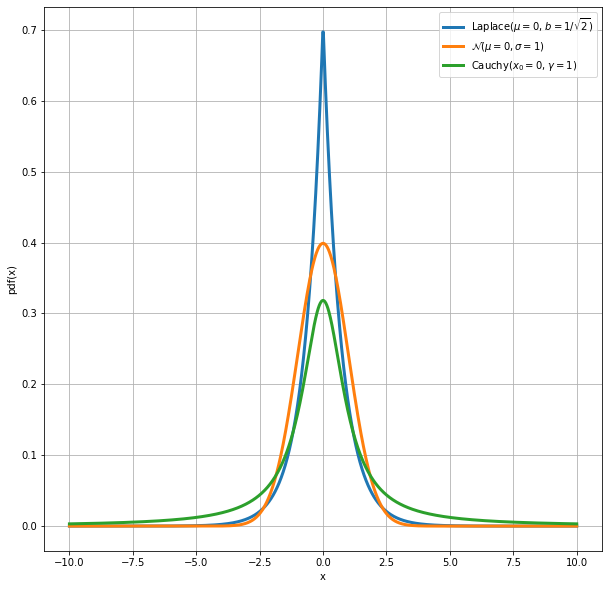

In [17]:
from scipy.stats import laplace, t, norm
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,1000)

ax.plot(x, laplace.pdf(x, scale = 0.5**0.5), label="Laplace$(\mu=0$, $b=1/\sqrt{2})$", linewidth = 3)
ax.plot(x, norm.pdf(x), label="$\mathcal{N}(\mu=0,\sigma=1)$", linewidth = 3)
ax.plot(x, t.pdf(x,df = 1), label="Cauchy$(x_0=0$, $\gamma=1)$", linewidth = 3)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.legend(loc='best', frameon=True)
# ax.set_ylim(0,0.45)
ax.grid(True)

### Бета распределение (Beta distribution)

Выше мы говорили о непрерывных распределениях определенных на всей числовой оси. Но как быть если случайная величина определена только на ограниченном промежутке? Самым популярным выбором в данной ситуации является бета распределение: 

$$PDF(x) = {\displaystyle {\frac {x^{\alpha -1}(1-x)^{\beta -1}}{\mathrm {B} (\alpha ,\beta )}}}$$

Бета распределение задается параметрами $\alpha$ и $\beta$ и определено для $x\in[0,1]$. Величина $\mathrm {B} (\alpha ,\beta )$ выступает нормировочным множтелем и не зависит от $x$. Рассмотрим как меняется распределение в зависимости от параметров: 

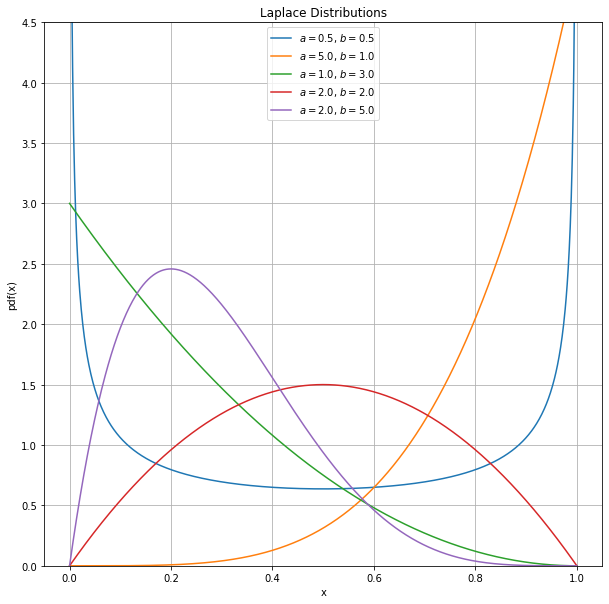

In [18]:
from scipy.stats import beta
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(0,1,1000)
pars = [[0.5, 0.5],
        [5.0, 1.0],
        [1.0, 3.0],
        [2.0, 2.0],
        [2.0, 5.0]]
for p in pars:
    ax.plot(x, beta.pdf(x,a = p[0], b=p[1]), label=f"$a={p[0]}$, $b={p[1]}$")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Laplace Distributions')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,4.5)
ax.grid(True)

Среднее и дисперсия определены как

$$\mu = \frac{\alpha}{\alpha+\beta}$$
$$\sigma^2 = {\displaystyle {\frac {\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1)}}}$$

В следующих лекций мы будем активно использовать бета распределение для описания априорных знаний о среднем значении распределения Бернулли.

### Экспоненциальное распределение (exponential distribution)

Экспоненциальное распределение определено на промежутке $x\in[0, +\infty)$:

$$ PDF(x) = 	{\displaystyle \lambda e^{-\lambda x}}\lambda e^{{-\lambda x}}$$

Это распределение имеет один параметр - масштаб $\lambda$. Через масштаб можно выразить матожидание и дисперсию экспоненциального распределения:

$$\mu = \frac{1}{\lambda}$$
$$\sigma^2 = \frac{1}{\lambda^2}$$

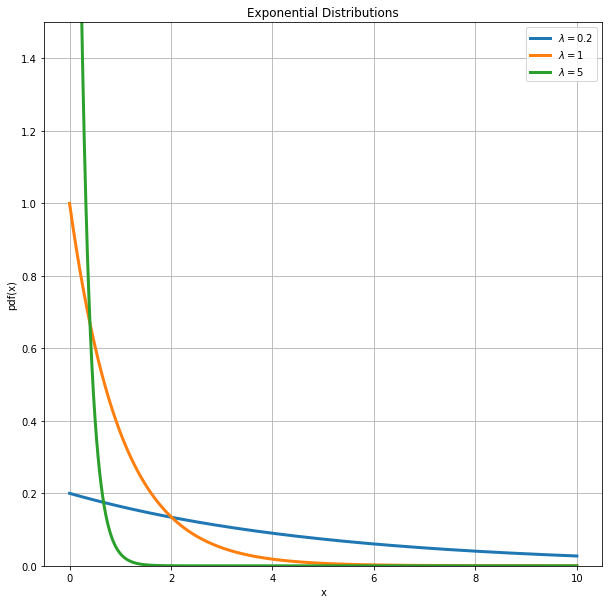

In [19]:
from scipy.stats import expon
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(0,10,1000)
pars = [0.2, 1, 5]
for p in pars:
    ax.plot(x, expon.pdf(x,scale = 1./p ), label=f"$\lambda={p}$", linewidth = 3)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Exponential Distributions')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,1.5)
ax.grid(True)

Экспоненциальное распределение широко используется на практике для описания вероятности ожидания случайного события - время до следующего телеофнного звонка, время между срабатываниями счетчика Гейгера, время до банкротства компании.

### Гамма распределение (Gamma distribution)

Экспоненциальное распределение является частным случаем Гамма распределения - семейства функций определенных на промежутке $x\in[0,+\infty)$:
$${\displaystyle PDF(x)={\frac {1}{\Gamma (k)\theta ^{k}}}x^{k-1}e^{-{\frac {x}{\theta }}}}$$

Расрпеделение задается двумя параметрами - $k$ и $\theta$. Параметр $k$ задает форму распределения, а параметр $\theta$ - масштаб.

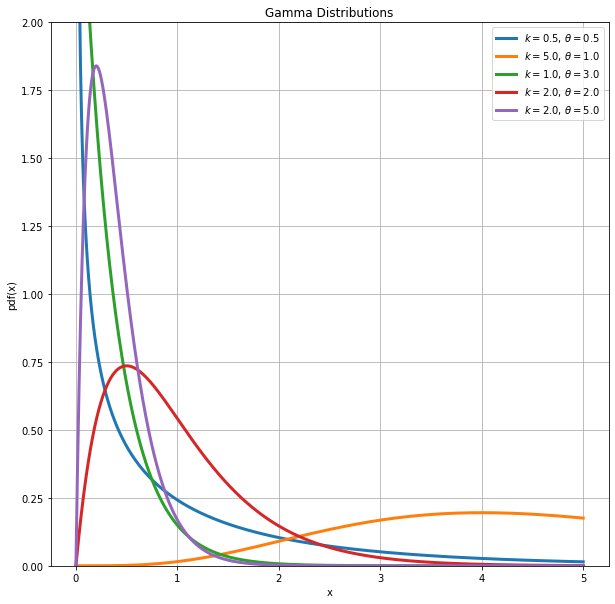

In [20]:
from scipy.stats import gamma
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(0,5,1000)
pars = [[0.5, 0.5],
        [5.0, 1.0],
        [1.0, 3.0],
        [2.0, 2.0],
        [2.0, 5.0]]
for p in pars:
    ax.plot(x, gamma.pdf(x,a = p[0], scale=1./p[1]), label=f"$k={p[0]}$, $\\theta={p[1]}$", linewidth = 3)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Gamma Distributions')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,2.0)
ax.grid(True)

Сумма $k$ экспоненцально распределенных случайных величин описывается гамма распределением: если $X_1,...X_k$n незавиимые случайные величины распределенные по закону $\mathrm{Expon}(\lambda)$, то $\sum_i X_i$ распределено по закону $\Gamma(k, 1/\lambda)$, а среднее - по закону $\Gamma(k, k/\lambda) При больших $k$  распределение стремится к нормальному:

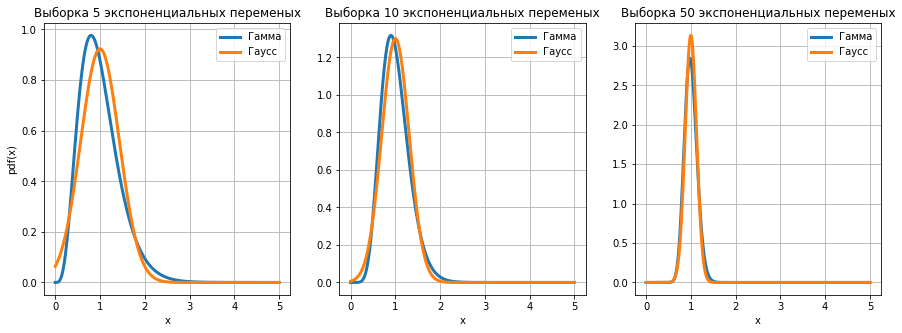

In [21]:
from scipy.stats import gamma, norm
fig, ax = plt.subplots(1, 3, figsize = (15,5))
x = np.linspace(0,5,1000)

ax[0].plot(x, gamma.pdf(x,a = 5, scale=1./5), label=f"Гамма", linewidth = 3)
ax[0].plot(x, norm.pdf(x, loc = 1, scale = gamma.rvs(a = 5, scale = 1./5, size = 100).std()), label=f"Гаусс", linewidth = 3)

ax[1].plot(x, gamma.pdf(x,a = 10, scale=1./10), label=f"Гамма", linewidth = 3)
ax[1].plot(x, norm.pdf(x, loc = 1, scale = gamma.rvs(a = 10, scale = 1./10, size = 100).std()), label=f"Гаусс", linewidth = 3)

ax[2].plot(x, gamma.pdf(x,a = 50, scale=1./50), label=f"Гамма", linewidth = 3)
ax[2].plot(x, norm.pdf(x, loc = 1, scale = gamma.rvs(a = 50, scale = 1./50, size = 100).std()), label=f"Гаусс", linewidth = 3)


ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].legend(loc='best', frameon=True)
ax[1].legend(loc='best', frameon=True)
ax[2].legend(loc='best', frameon=True)
ax[0].set_title("Выборка 5 экспоненциальных переменых")
ax[1].set_title("Выборка 10 экспоненциальных переменых")
ax[2].set_title("Выборка 50 экспоненциальных переменых")
# ax.set_ylim(0,2.0)
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

## Преобразования распределений
### Композитные модели

Распределения выше обычно используются для описания процессов вызваных одним источником и ширина распределения является мерой стохастичности процесса. Намриер, мы можем использвоать нормальное распределение для описания времени круга на тренировке пилота Формулы 1 - пилот проходит круги за примерно одинаковое время, и незначительные флуктуации могут быть вызваны случайными событиями вроде порывов ветра. Однако что если на трассе теперь тренируются два гонщика и мы будем записывать их время. Построим гистограмму наших записей.

Text(0.5, 1.0, 'Бимодальное распределение')

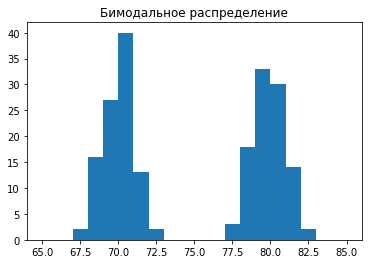

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

t1 = norm(loc = 70).rvs(size = 100)
t2 = norm(loc = 80).rvs(size = 100)
plt.hist(np.concatenate([t1,t2]), range = [65, 85], bins = 20)
plt.title("Бимодальное распределение")

Видно, что теперь мы имеем дело с бимодальным распределением - каждый из пиков создан собсвтенным процессом.

Это довольно частая ситуация на практике - редко встречаются наборы данных все процессы в которых объясняются одним процессом. При анализе спектров в физике частиц обычно приходится учитывать довольно больше количество источников сигнала. При анализе трафика интернет магазина зачастую выделяют несколько категорий пользователей, со своими моделями поведения для каждой категории.

Для получения выборок из распределений выше мы использовали пакет `scipy.stats`. Он позволял задавать распрееделния и получать выборки из него. Но для описания композитных моделей придется использовать более специализированые пакеты для вероятностного моделирования (probabilistic modeling). На первой лекции мы уже познакомились с одним таким пакетом -  `pymc3`. В этот раз давайте попробуем построить композитную модель для распределения выше с пакетом [`zfit`](https://zfit.readthedocs.io/en/0.10.1/index.html).

Модель будет иметь пять параметров - по два для каждого из нормальных распределений и один параметр отвечающий за относительные вклады обоих процессов.

2022-09-15 21:35:19.281756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are cu

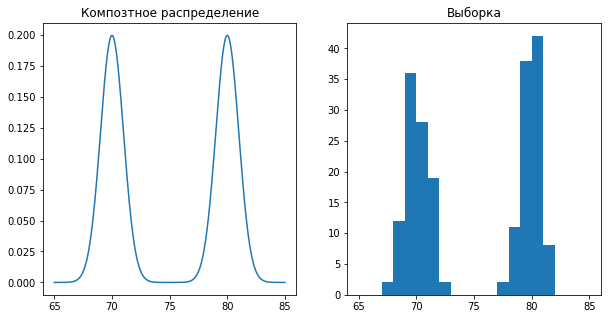

In [1]:
import tensorflow as tf
import zfit
from zfit import z
import matplotlib.pyplot as plt
import numpy as np

mean_1 = 70
mean_2 = 80
sigma_1 = 1
sigma_2 = 1
frac = 0.5

obs = zfit.Space('x', limits=(65, 85))

mu_1 = zfit.Parameter("mu_1", mean_1)
sigma_1 = zfit.Parameter("sigma_1", sigma_1)
mu_2 = zfit.Parameter("mu_2", mean_2)
sigma_2 = zfit.Parameter("sigma_2", sigma_2)
frac = zfit.Parameter("frac", frac)

gauss_1 = zfit.pdf.Gauss(obs=obs, mu=mu_1, sigma=sigma_1)
gauss_2 = zfit.pdf.Gauss(obs=obs, mu=mu_2, sigma=sigma_2)
sum_pdf = zfit.pdf.SumPDF([gauss_1, gauss_2], fracs = frac)


lower, upper = obs.limits
# evaluate the func at multiple x and plot
x_plot = np.linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(sum_pdf.pdf(x_plot, norm_range=obs))

data = sum_pdf.create_sampler(n=200, fixed_params=True).numpy()

f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x_plot, y_plot)
ax[0].set_title("Композтное распределение")
ax[1].hist(data, range = [65, 85], bins = 20)
ax[1].set_title("Выборка")
plt.show()
